# Sentiment Analysis of Financial News Headlines
## This task tests your ability to apply NLP techniques you've learnt to classify a news headline containing financial information into either one of the sentiments (Positive, Negative or Neutral)

### Dataset:
https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv

## Max Marks without Bonus attempted: 80 points
## Max Marks with Bonus: 100 points
- ### Bonus: 20 points

### Steps
- 1. Download the dataset
- 2. Load the dataset
- 3. Explore the dataset (Exploratory Data Analysis)
- 4. Clean the data
- 5. Apply SMOTE for imbalanced data [Optional] --> Carries Bonus Marks
- 6. Build a BoW model
- 7. Build a Tf-Idf model
- 8. Split train and test data
- 9. Use one ML Classifying algorithm to classify the finanical news headline data
- 10. Use another ML classifying algorithm to classify them
- 11. Plot Confusion matrix 

## 1. Download the dataset [1 point]

## 2. Load the dataset [1 point]

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
h_cols = ['sentiment', 'headline']
news_handline = pd.read_csv('financial_news_headlines_sentiment.csv', sep=',', names=h_cols,encoding='latin-1')

## 3. Explore the dataset [10 points]

In [13]:
print("shape : ", news_handline.shape)
print(news_handline.head())
print(news_handline['sentiment'].value_counts())

shape :  (4840, 2)
  sentiment                                           headline
0   neutral  according to gran , the company has no plans t...
1   neutral  technopolis plans to develop in stages an area...
2  negative  the international electronic industry company ...
3  positive  with the new production plant the company woul...
4  positive  according to the company 's updated strategy f...
sentiment
neutral     2873
positive    1363
negative     604
Name: count, dtype: int64


## 4. Clean the data [5 points]

In [14]:
# Check for null values
if news_handline.isnull().sum().any():
    news_handline = news_handline.dropna()  # or fill them with appropriate values

# Remove duplicates
news_handline = news_handline.drop_duplicates()

# Clean the text data
news_handline['headline'] = news_handline['headline'].str.replace('[^\w\s]','')  # remove punctuation
news_handline['headline'] = news_handline['headline'].str.lower()  # convert to lowercase

print("shape : ", news_handline.shape)
print(news_handline.head())
print(news_handline['sentiment'].value_counts())

shape :  (4840, 2)
  sentiment                                           headline
0   neutral  according to gran , the company has no plans t...
1   neutral  technopolis plans to develop in stages an area...
2  negative  the international electronic industry company ...
3  positive  with the new production plant the company woul...
4  positive  according to the company 's updated strategy f...
sentiment
neutral     2873
positive    1363
negative     604
Name: count, dtype: int64


## 5. SMOTE (Imbalanced dataset) [OPTIONAL] BONUS [20 points]
Hint: Use **imblearn** library

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
X = news_handline.headline
y = news_handline.sentiment

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vect = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_vect = vectorizer.transform(X_test)

# Use SMOTE to oversample the minority class
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_vect, y_train)

# Train the model on the balanced training set
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

# Test the model on the test set
y_pred = model.predict(X_test_vect)

# Print the classification report
print(classification_report(y_test, y_pred))

c:\Users\yatch\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\yatch\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


              precision    recall  f1-score   support

    negative       0.69      0.69      0.69       118
     neutral       0.82      0.84      0.83       563
    positive       0.71      0.67      0.69       287

    accuracy                           0.77       968
   macro avg       0.74      0.74      0.74       968
weighted avg       0.77      0.77      0.77       968



c:\Users\yatch\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 6. BoW model [15 points]

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

# Define the corpus
corpus = news_handline['headline'].values

# Initialize a CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the corpus
X = vectorizer.fit_transform(corpus)

# To get feature names
print(vectorizer.get_feature_names_out())

# To get the BoW matrix as an array
print(X.toarray())

['00' '000' '000063' ... 'æskyl' 'ætehuolto' 'ðl']
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## 7. Tf-idf model [15 points]

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Get the corpus from 'headline' column
corpus = news_handline['headline'].values

# Initialize a TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the corpus
X = vectorizer.fit_transform(corpus)

# To get feature names
print(vectorizer.get_feature_names_out())

# To get the TF-IDF matrix as an array
print(X.toarray())

['00' '000' '000063' ... 'æskyl' 'ætehuolto' 'ðl']
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.14699511 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


## 8. Split train test data [3 points]

In [20]:
# Load the dataset
X = news_handline.headline
y = news_handline.sentiment

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 9. Classification Algorithm [10 points]
- Train
- Predict

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Get the corpus from 'headline' column
corpus = news_handline['headline'].values

# Get the labels from 'label' column
labels = news_handline['sentiment'].values

# Initialize a TfidfVectorizer
vectorizer = TfidfVectorizer()

# Convert the corpus into a matrix of TF-IDF features
features = vectorizer.fit_transform(corpus)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Test the classifier
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       1.00      0.04      0.08       118
     neutral       0.67      0.98      0.79       563
    positive       0.67      0.31      0.42       287

    accuracy                           0.67       968
   macro avg       0.78      0.44      0.43       968
weighted avg       0.71      0.67      0.60       968



## 10. Another Classification Algorithm [10 points]
- Train
- Predict

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Get the corpus from 'headline' column
corpus = news_handline['headline'].values

# Get the labels from 'label' column
labels = news_handline['sentiment'].values

# Initialize a TfidfVectorizer
vectorizer = TfidfVectorizer()

# Convert the corpus into a matrix of TF-IDF features
features = vectorizer.fit_transform(corpus)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train a SVM classifier
clf = SVC()
clf.fit(X_train, y_train)

# Test the classifier
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.86      0.41      0.55       118
     neutral       0.71      0.98      0.82       563
    positive       0.87      0.40      0.55       287

    accuracy                           0.74       968
   macro avg       0.81      0.60      0.64       968
weighted avg       0.78      0.74      0.71       968



## 11. Confusion Matrixes for two classification algorithms and two feature extractor methods [10 points]

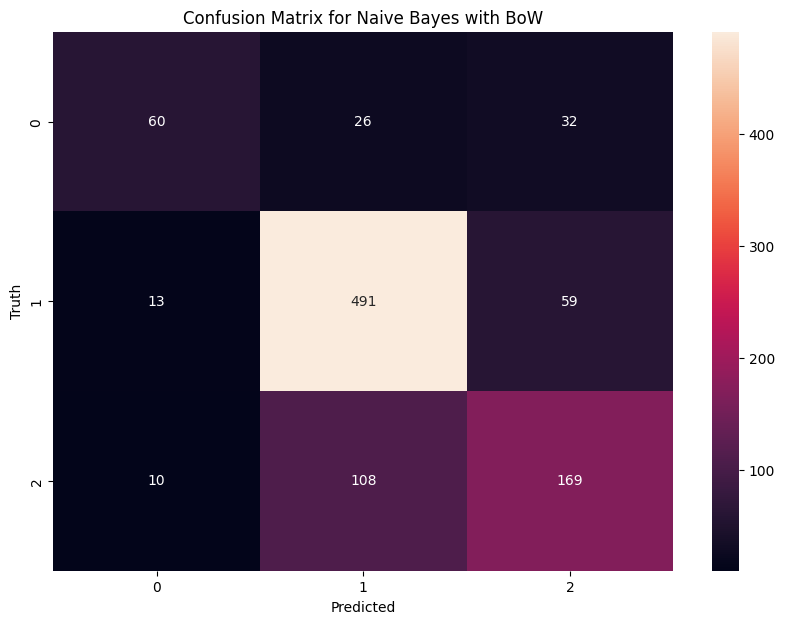

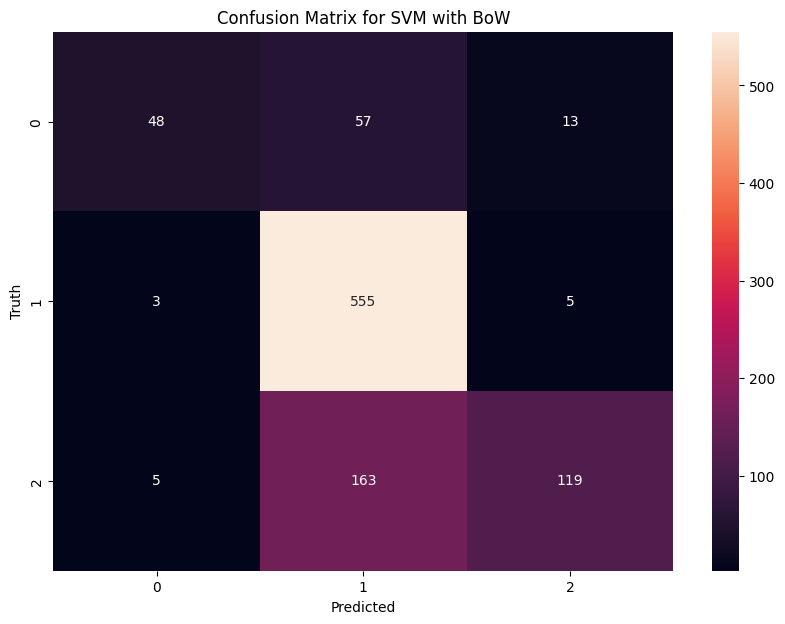

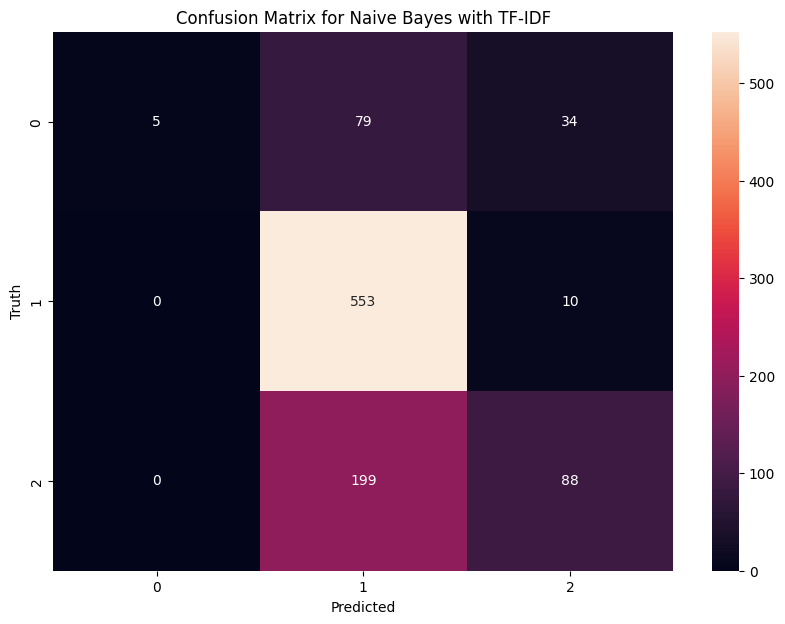

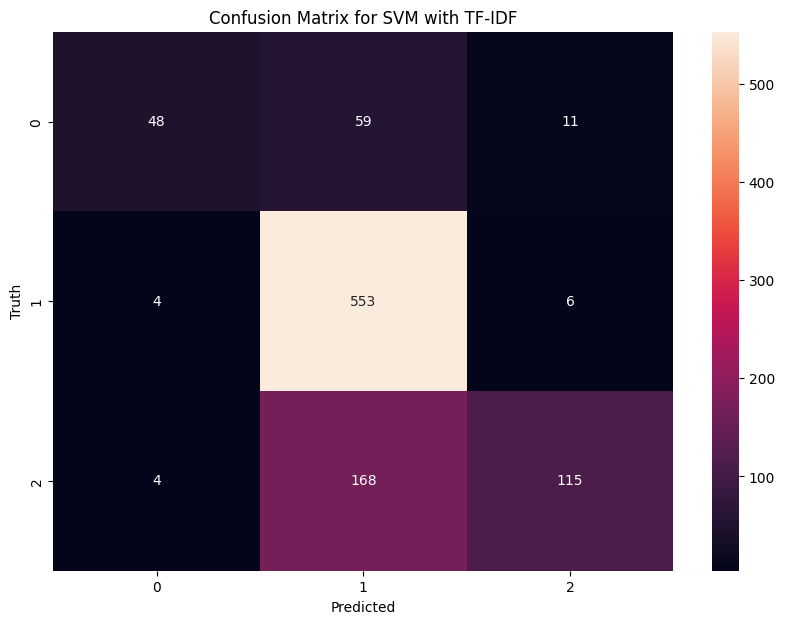

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Get the corpus from 'headline' column
corpus = news_handline['headline'].values

# Get the labels from 'label' column
labels = news_handline['sentiment'].values

# Define the vectorizers
vectorizers = {
    'BoW': CountVectorizer(),
    'TF-IDF': TfidfVectorizer()
}

# Define the classifiers
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC()
}

# For each combination of vectorizer and classifier
for vect_name, vectorizer in vectorizers.items():
    for clf_name, clf in classifiers.items():
        # Convert the corpus into a matrix of features
        features = vectorizer.fit_transform(corpus)

        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

        # Train the classifier
        clf.fit(X_train, y_train)

        # Test the classifier
        y_pred = clf.predict(X_test)

        # Compute the confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Display the confusion matrix
        plt.figure(figsize=(10,7))
        sns.heatmap(cm, annot=True, fmt='d')
        plt.title(f'Confusion Matrix for {clf_name} with {vect_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Truth')
        plt.show()